#I. Kafka Architecture

Kafka is a streaming platform that get data between systems or applications. Also it allows the building of real-time streaming applications that transform or react to the streams of data.

Kafka is run as a cluster on one or more servers that can span multiple datacenters. The Kafka cluster stores streams of records in categories called topics. Each record consists of a key, a value, and a timestamp.

Kafka has four core APIs:



1.   The Producer API allows an application to publish a stream of records to one or more Kafka topics.
2.   The Consumer API allows an application to subscribe to one or more topics and process the stream of records produced to them.
3.   The Streams API allows an application to act as a stream processor, consuming an input stream from one or more topics and producing an output stream to one or more output topics, effectively transforming the input streams to output streams.
4.   The Connector API allows building and running reusable producers or consumers that connect Kafka topics to existing applications or data systems. For example, a connector to a relational database might capture every change to a table.

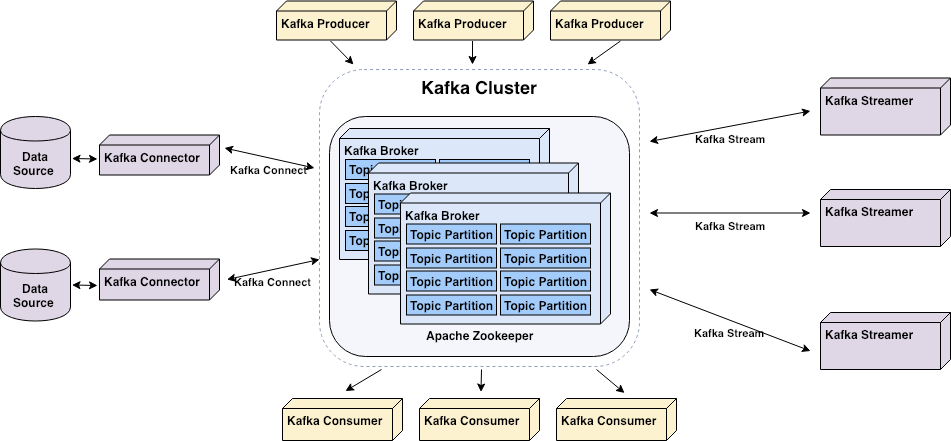

#II. Envirement preparation

Requirements


*   Your local environment must have Java 8+ installed.
*   Download and install zookeeper
*   Download and install Kafka
*   Download and install zookeeper
*   Configuration of Kafka clustrer



In [1]:
#Your local environment must have Java 8+ installed.
!java -version

openjdk version "11.0.19" 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

In [3]:
##Download and install zookeeper
!wget https://dlcdn.apache.org/zookeeper/zookeeper-3.8.1/apache-zookeeper-3.8.1-bin.tar.gz


--2023-06-16 21:46:03--  https://dlcdn.apache.org/zookeeper/zookeeper-3.8.1/apache-zookeeper-3.8.1-bin.tar.gz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13368512 (13M) [application/x-gzip]
Saving to: ‘apache-zookeeper-3.8.1-bin.tar.gz’

apache-zookeeper-3. 100%[===================>]  12.75M  --.-KB/s    in 0.1s    

2023-06-16 21:46:03 (101 MB/s) - ‘apache-zookeeper-3.8.1-bin.tar.gz’ saved [13368512/13368512]



In [4]:
!tar -xzvf apache-zookeeper-3.8.1-bin.tar.gz

apache-zookeeper-3.8.1-bin/docs/
apache-zookeeper-3.8.1-bin/docs/skin/
apache-zookeeper-3.8.1-bin/docs/images/
apache-zookeeper-3.8.1-bin/docs/zookeeperHierarchicalQuorums.html
apache-zookeeper-3.8.1-bin/docs/zookeeperMonitor.html
apache-zookeeper-3.8.1-bin/docs/skin/getMenu.js
apache-zookeeper-3.8.1-bin/docs/skin/current.gif
apache-zookeeper-3.8.1-bin/docs/skin/page.gif
apache-zookeeper-3.8.1-bin/docs/skin/printer.gif
apache-zookeeper-3.8.1-bin/docs/skin/chapter_open.gif
apache-zookeeper-3.8.1-bin/docs/skin/init.js
apache-zookeeper-3.8.1-bin/docs/skin/header_white_line.gif
apache-zookeeper-3.8.1-bin/docs/skin/instruction_arrow.png
apache-zookeeper-3.8.1-bin/docs/skin/prototype.js
apache-zookeeper-3.8.1-bin/docs/skin/basic.css
apache-zookeeper-3.8.1-bin/docs/skin/print.css
apache-zookeeper-3.8.1-bin/docs/skin/menu.js
apache-zookeeper-3.8.1-bin/docs/skin/screen.css
apache-zookeeper-3.8.1-bin/docs/skin/chapter.gif
apache-zookeeper-3.8.1-bin/docs/skin/getBlank.js
apache-zookeeper-3.8.1-bi

In [7]:
#Download and install Kafka

!wget https://dlcdn.apache.org/kafka/3.4.1/kafka_2.13-3.4.1.tgz


--2023-06-16 21:55:56--  https://dlcdn.apache.org/kafka/3.4.1/kafka_2.13-3.4.1.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106613091 (102M) [application/x-gzip]
Saving to: ‘kafka_2.13-3.4.1.tgz’

kafka_2.13-3.4.1.tg 100%[===================>] 101.67M   191MB/s    in 0.5s    

2023-06-16 21:56:00 (191 MB/s) - ‘kafka_2.13-3.4.1.tgz’ saved [106613091/106613091]



In [9]:
!tar -xzf kafka_2.13-3.4.1.tgz

In [11]:
# To start ZooKeeper you need a configuration file.
# copy content from <kafka install>/config/zookeeper.properties to  <zookeeper install>conf/zoo.cfg and :
# tickTime=2000
# dataDir=/var/lib/zookeeper
# clientPort=2181


# Start the ZooKeeper service
!apache-zookeeper-3.8.1-bin/bin/zkServer.sh start

ZooKeeper JMX enabled by default
Using config: /content/apache-zookeeper-3.8.1-bin/bin/../conf/zoo.cfg
Starting zookeeper ... STARTED


In [12]:
#verify that zookeeper server is running correctly
!apache-zookeeper-3.8.1-bin/bin/zkServer.sh status

ZooKeeper JMX enabled by default
Using config: /content/apache-zookeeper-3.8.1-bin/bin/../conf/zoo.cfg
Client port found: 2181. Client address: localhost. Client SSL: false.
Mode: standalone


In [13]:
#Start the Kafka server
!kafka_2.13-3.4.1/bin/kafka-server-start.sh -daemon kafka_2.13-3.4.1/config/server.properties &

# Start the Kafka broker service
#import os
#os.system("!sudo kafka_2.13-3.4.0/bin/kafka-server-start.sh &")
#os.system("!kafka_2.13-3.4.0/bin/kafka-server-start.sh kafka_2.13-3.4.0/config/server.properties ")
#By default Apache Kafka will run on port 9092 and Apache Zookeeper will run on port 2181.

In [15]:
#verify that kafka server is running correctly
!kafka_2.13-3.4.1/bin/kafka-topics.sh --list --bootstrap-server localhost:9092


#III. Basic Example

kafka-python is a python client for the Apache Kafka. it is designed to function much like the official java client, with a sprinkling of pythonic interfaces (e.g., consumer iterators).


In [2]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Below is a simple example of a data pipeline where a producer sends data to a topic and a consumer continuously receives the stream of records from the topic.

Define producer.py  and consumer.py then execute them with the command below.

In [1]:
!python producer.py & python consumer.py &

# ##########
# #Producer#
# ##########

# data=["message1","message2", "message1 and message2", "message1 and message2 and message3"]
# from typing_extensions import dataclass_transform
# from kafka import KafkaProducer
# topic="topic1"
# producer = KafkaProducer(bootstrap_servers='localhost:9092')
# for d in data:
#   future=producer.send(topic, bytes(d, 'utf-8'))
#   # Block until a single message is sent (or timeout)
#   result = future.get(timeout=60)

# ##########
# #Consumer#
# ##########
# from kafka import KafkaConsumer
# consumer = KafkaConsumer('topic1')
# for msg in consumer:
#   print (msg)



ConsumerRecord(topic='topic1', partition=0, offset=0, timestamp=1686954019632, timestamp_type=0, key=None, value=b'message1', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=8, serialized_header_size=-1)
ConsumerRecord(topic='topic1', partition=0, offset=1, timestamp=1686954049671, timestamp_type=0, key=None, value=b'message2', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=8, serialized_header_size=-1)
ConsumerRecord(topic='topic1', partition=0, offset=2, timestamp=1686954079707, timestamp_type=0, key=None, value=b'message1 and message2', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=21, serialized_header_size=-1)
ConsumerRecord(topic='topic1', partition=0, offset=3, timestamp=1686954109746, timestamp_type=0, key=None, value=b'message1 and message2 and message3', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=34, serialized_header_size=-1)


KeyboardInterrupt: ignored

Below another example with a spark consumer. The Kafka client get data from the topic and produce a word count output while there are new records received in the topic.

Define kafkaconsumer.py then execute them with the command below.

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!python producer.py & python kafkaconsumer.py &

# ##########
# #Producer#
# ##########
# import time
# data=["message1","message2", "message1 and message2", "message1 and message2 and message3"]
# from typing_extensions import dataclass_transform
# from kafka import KafkaProducer
# topic="topic1"
# producer = KafkaProducer(bootstrap_servers='localhost:9092')
# for d in data:
#   time.sleep(30). #<===========
#   future=producer.send(topic, bytes(d, 'utf-8'))
#   # Block until a single message is sent (or timeout)
#   result = future.get(timeout=60)


# ##################
# #Kafka Consumer#
# ##################
# add Spark dependencies
# import os
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.4.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.4.0 pyspark-shell'

# """
#  Consumes messages from one or more topics in Kafka and does wordcount.
#    <bootstrap-servers> The Kafka "bootstrap.servers" configuration. A
#    comma-separated list of host:port.

#    <subscribe-type> There are three kinds of type, i.e. 'assign', 'subscribe',
#    'subscribePattern'.
#    |- <assign> Specific TopicPartitions to consume. Json string
#    |  {"topicA":[0,1],"topicB":[2,4]}.
#    |- <subscribe> The topic list to subscribe. A comma-separated list of
#    |  topics.
#    |- <subscribePattern> The pattern used to subscribe to topic(s).
#    |  Java regex string.
#    |- Only one of "assign, "subscribe" or "subscribePattern" options can be
#    |  specified for Kafka source.

#    <topics> Different value format depends on the value of 'subscribe-type'.
#  Run the example
#     `$ bin/spark-submit examples/src/main/python/sql/streaming/structured_kafka_wordcount.py \
#     host1:port1,host2:port2 subscribe topic1,topic2`
# """
# import sys

# from pyspark.sql import SparkSession
# from pyspark.sql.functions import explode
# from pyspark.sql.functions import split


# bootstrapServers ="localhost:9092"
# subscribeType = "subscribe"
# topics = "topic1"

# spark = SparkSession\
#     .builder\
#     .appName("StructuredKafkaWordCount")\
#     .getOrCreate()

# # Create DataSet representing the stream of input lines from kafka
# lines = spark\
#     .readStream\
#     .format("kafka")\
#     .option("kafka.bootstrap.servers", bootstrapServers)\
#     .option(subscribeType, topics)\
#     .load()\
#     .selectExpr("CAST(value AS STRING)")

# # Split the lines into words
# words = lines.select(
#     # explode turns each item in an array into a separate row
#     explode(
#         split(lines.value, ' ')
#     ).alias('word')
# )

# # Generate running word count
# wordCounts = words.groupBy('word').count()

# # Start running the query that prints the running counts to the console
# query = wordCounts\
#     .writeStream\
#     .outputMode('complete')\
#     .format('console')\
#     .start()

# query.awaitTermination()


:: loading settings :: url = jar:file:/usr/local/lib/python3.10/dist-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.spark#spark-streaming-kafka-0-10_2.12 added as a dependency
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-6785567e-2eec-4910-b84f-6f168c83fb95;1.0
	confs: [default]
	found org.apache.spark#spark-streaming-kafka-0-10_2.12;3.4.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.4.0 in central
	found org.apache.kafka#kafka-clients;3.3.2 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.9.1 in central
	found org.slf4j#slf4j-api;2.0.6 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.4 in central
	found org.apache.hadoop#hadoop-client-api;3.3.4 in central
	found commons-logg

#III. Application: Realtime Processing of News


Based on (Spark, Kafka, HDFS), define clearly  a data processing pipeline for a subject of your choice (Topic Detection, sentiment analysis...)



*   Choose some  data sources for news
*   Define the producers
  *   one producer per source (each producer injects data into all topics)
  *   or one producer per topic (each producer connects to all sources)
   *      define a kafka consumer to display the processing results

In [5]:
!pip install GoogleNews
!pip install newspaper3k
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Sentiment Analysis : Negative, Neutral, Positive

In [9]:
!python covidproducer.py & python sentimentAnalysisConsumer.py &

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Tweet: FDA asks drugmakers to update Covid boosters to target XBB.1.5 for the fall
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Tweet: US FDA advises COVID vaccine makers to develop shots aimed at XBB.1.5 variant
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Tweet: Revealed: Full extent of boozing, debauchery and rule-breaking inside Boris's No 10
Sentiment: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
----
Tweet: Revealed: Full extent of boozing, debauchery and rule-breaking inside Boris's No 10
Sentiment: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
----
Tweet: Next round of COVID-19 shots in fall will target latest omicron strain
Sentiment: {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.0516}
----
Tweet: Covid boosters: FDA panel recommends new XBB shots for the fall
Sentiment: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound':

KeyboardInterrupt: ignored

In [11]:
!python covidproducer.py & python binarySentimentAnalysisConsumer.py &

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Sentiment positif
Tweet: Covid boosters: FDA panel recommends new XBB shots for the fall
Sentiment: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}
----
Sentiment positif
Tweet: Covid boosters: FDA panel recommends new XBB shots for the fall
Sentiment: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}
----
Sentiment négatif
Tweet: Revealed: Full extent of boozing, debauchery and rule-breaking inside Boris's No 10
Sentiment: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
----
Sentiment négatif
Tweet: Los Angeles’ Mark Taper Forum Theater Season Canceled As Covid Reverberations Present “Crisis Unlike Any Other”
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Sentiment négatif
Tweet: Revealed: Full extent of boozing, debauchery and rule-breaking inside Boris's No 10
Sentiment: {'neg': 0.167, 'neu': 0.833, 'po

KeyboardInterrupt: ignored

In [18]:
!python covidproducer.py & python binarySentimentAnalysisConsumer.py &

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Tweet: New COVID shots will target dominant version of XBB strain
Sentiment: {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.0516}
----
Tweet: Revealed: Full extent of boozing, debauchery and rule-breaking inside Boris's No 10
Sentiment: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
----
Tweet: New study reveals impacts of long COVID
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Tweet: New COVID shots will target dominant version of XBB strain
Sentiment: {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.0516}
----
Tweet: New COVID-19 variants are still affecting people
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Tweet: New study reveals impacts of long COVID
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----
Tweet: Former Covid testing tsar Sir John Bell ‘delighted